In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
import re

In [27]:
df = pd.read_csv('data.csv')
df = df[df.columns[1:]]
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [29]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/114adkiss/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df.isna()


,title,text,label
0,False,False,False
1,True,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
72129,False,False,False
72130,False,False,False
72131,False,False,False
72132,False,False,False


In [32]:
df.isnull().sum()


title    558
text      39
label      0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()


title    0
text     0
label    0
dtype: int64

In [35]:
df["content"] = df["title"]+" "+df["text"]
df.head()

,title,text,label,content
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...


In [36]:
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

def stemming(content):
    clean_text = re.sub(r'\W+', ' ', content).lower().split()
    clean_text = " ".join(clean_text)
    return clean_text

In [37]:
X = df["content"].apply(stemming)
y = df["label"]

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=100, max_df=0.90, stop_words='english', max_features=10000)
X = vectorizer.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

starting to train models


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model name:  Logistic Regression
model name:  SVM
model name:  Random Forest
                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regression        0.958378       0.946324         0.958400   
1                  SVM        0.994373       0.963377         0.994375   
2        Random Forest        1.000000       0.953592         1.000000   

   Test Precision  Train Recall  Test Recall  Train F1 Score  Test F1 Score  
0        0.946383      0.958378     0.946324        0.958374       0.946314  
1        0.963587      0.994373     0.963377        0.994373       0.963364  
2        0.953856      1.000000     0.953592        1.000000       0.953573  


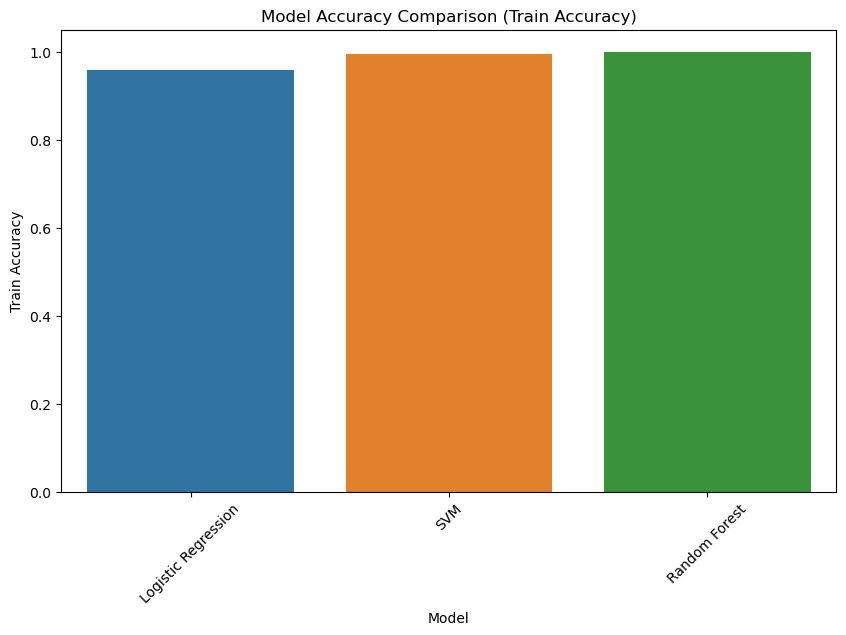

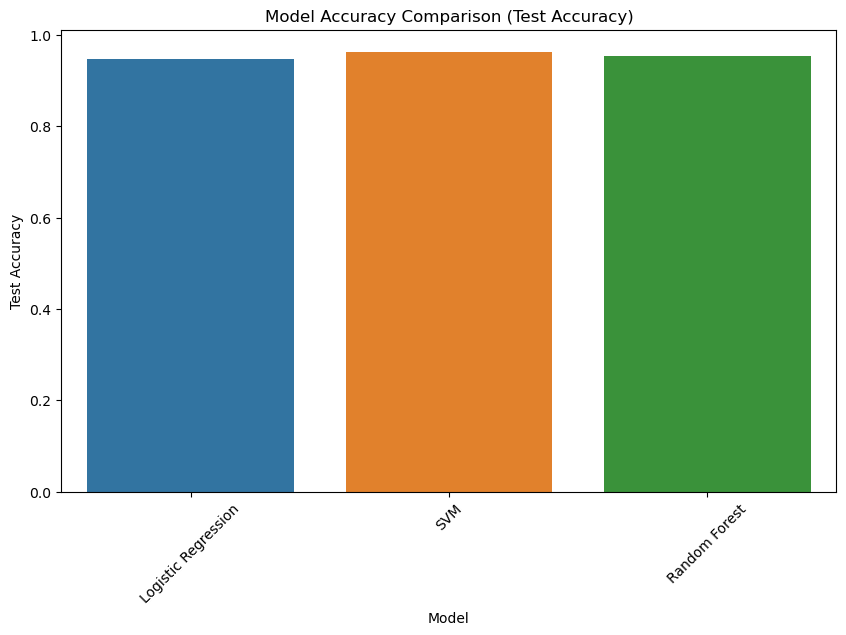

In [43]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC


models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
}
print("starting to train models")
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions for training data
    y_train_pred = model.predict(X_train)
    
    # Predictions for testing data
    y_test_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train Precision": precision_score(y_train, y_train_pred, average='weighted'),
        "Test Precision": precision_score(y_test, y_test_pred, average='weighted'),
        "Train Recall": recall_score(y_train, y_train_pred, average='weighted'),
        "Test Recall": recall_score(y_test, y_test_pred, average='weighted'),
        "Train F1 Score": f1_score(y_train, y_train_pred, average='weighted'),
        "Test F1 Score": f1_score(y_test, y_test_pred, average='weighted')
    })
    print("model name: ", name)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Train Accuracy", data=results_df)
plt.title("Model Accuracy Comparison (Train Accuracy)")
plt.xticks(rotation=45)
plt.show()

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Test Accuracy", data=results_df)
plt.title("Model Accuracy Comparison (Test Accuracy)")
plt.xticks(rotation=45)
plt.show()